In [1]:
import sys
import numpy as np
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import time
import sys
from pprint import pprint
import os
import csv
import seaborn as sns

In [2]:
csv_path = "artistfinal_with_avgcomp.csv"
songs_df=pd.read_csv(csv_path,encoding='ANSI')
songs_df.head()

,ID,title,followers_count,genres,popularity,avgcompscore,albumname,year
0,1,A Boogie Wit da Hoodie,1371562,pop,84,0.410429,The Bigger Artist,2018.0
1,2,A Canorous Quintet,347,NaN,9,-0.535836,Alive from the World Beyond (Live),2018.0
2,3,A Flock Of Seagulls,119714,dance rock,60,0.384815,Playlist: The Very Best of A Flock of Seagulls,2018.0
3,4,a-ha,458004,dance rock,72,0.167887,Hunting High And Low,1985.0
4,5,A Kiss To Build A Dream On,44,NaN,0,-0.979600,A Kiss to Build a Dream on,2018.0


In [3]:
rank_gt11 = songs_df["popularity"] > 80
df = songs_df[rank_gt11]
df = df.sort_values(by=["avgcompscore"], axis=0, ascending=False)
df.head(5)

,ID,title,followers_count,genres,popularity,avgcompscore,albumname,year
3291,3335,Michael Jackson,4722341,dance pop,84,0.9976,Sinatra/Jobim: The Complete Reprise Recordings,NaN
735,747,Kodak Black,2727671,hip hop,87,0.9952,Nothing To Hide,1973.0
4648,4701,Arctic Monkeys,5323132,garage rock,84,0.9916,Sunlit Youth,2018.0
5407,5468,Coldplay,10931959,permanent wave,89,0.9905,Inhuman Rampage,2018.0
2434,2468,Fleetwood Mac,1907383,album rock,81,0.9839,Aretha Now,1968.0


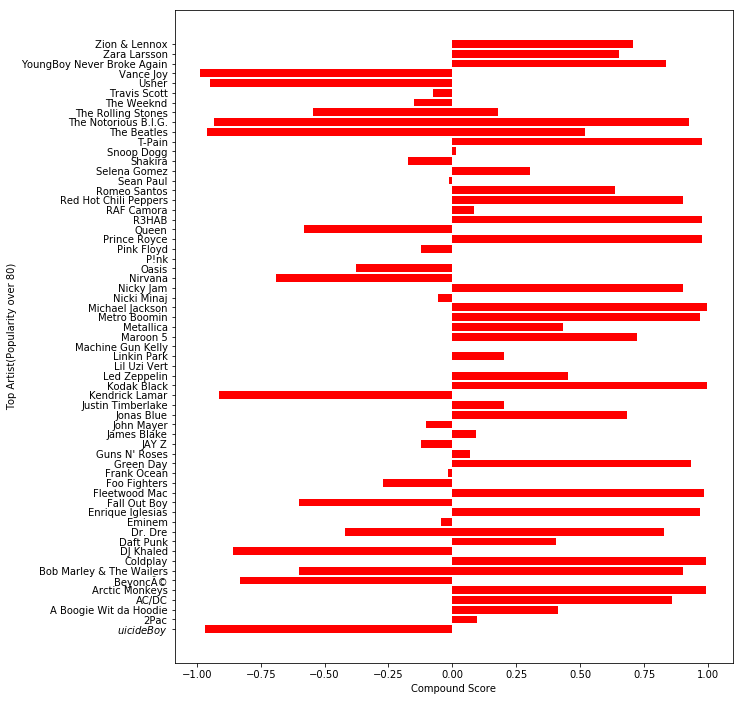

In [5]:
plt.figure(figsize=(10,12))
plt.xlabel("Compound Score")
plt.ylabel("Top Artist(Popularity over 80)")
plt.barh(df["title"],df["avgcompscore"],color="red")
plt.show()


In [10]:
rank_gt11 = songs_df["popularity"] > 75
df = songs_df[rank_gt11]
df = df.sort_values(by=["avgcompscore"], axis=0, ascending=False)
df.head(5)


,ID,title,followers_count,genres,popularity,avgcompscore,albumname,year
3291,3335,Michael Jackson,4722341,dance pop,84,0.9976,Sinatra/Jobim: The Complete Reprise Recordings,NaN
735,747,Kodak Black,2727671,hip hop,87,0.9952,Nothing To Hide,1973.0
3625,3671,Keith Urban,2046072,australian country,77,0.9942,A Hundred Miles Or More: A Collection,2018.0
4189,4238,Madonna,2064271,dance pop,77,0.9942,Different dreams,2018.0
4648,4701,Arctic Monkeys,5323132,garage rock,84,0.9916,Sunlit Youth,2018.0


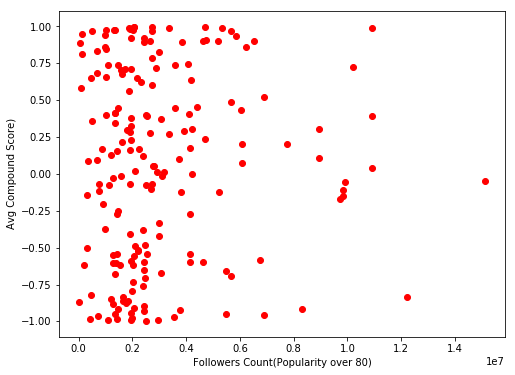

In [14]:
plt.figure(figsize=(8,6))
plt.xlabel("Followers Count(Popularity over 75)")
plt.ylabel("Avg Compound Score)")
plt.scatter(df["followers_count"],df["avgcompscore"],color="red")
plt.show()

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgMAAAF3CAYAAAA4gEgdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvpW3flQAAIABJREFUeJzt3Xu8ZFV95/3PtxsQG2/QjQlR+jQq%0AGtFRlPY2GhUVxR4DZkIieDQNEnsC0RjzmJc4ZJBo+gkxkyBGQZEAHbtHUJJoj4MxXjCaiRAOAbmK%0AtASQB6JN4w1BoLt/zx97l11dpy67qvauffu+X696napdu6rWPqe71m+t9VtrKSIwMzOz9lpSdgHM%0AzMysXA4GzMzMWs7BgJmZWcs5GDAzM2s5BwNmZmYt52DAzMys5RwMmJmZtZyDATMzs5ZzMGBmZtZy%0ADgbMzMxabo+yCzBLK1asiFWrVpVdDDMzs5m46qqr7omI/Ued16pgYNWqVSwsLJRdDDMzs5mQdHuW%0A8zxMYGZm1nIOBszMzFrOwYCZmVnLORgwMzNrOQcDZmZmLedgwMzMrOUcDJiZmbWcgwEzM7OWczBg%0AZmbWcg4GzMzMWq7UYEDS+ZK+L+n6Ac9L0ockbZF0raTndj23VtIt6W3t7EptZmbWLGX3DFwIHDnk%0A+dcCB6e3dcA5AJL2A94LvAB4PvBeSfsWWtK2OPlk2GMPkJKfJ5882fts2gSrVsGSJcnPTZvyLGU5%0AmnhNZmaUHAxExNeAe4eccjTwN5G4HHicpAOA1wBfjIh7I+IHwBcZHlRYP72V2zOeAeecAzt2JM/v%0A2JE8Hjcg2LQJ1q2D22+HiOTnunXjV55VqnybeE3WHP53ZdOKiFJvwCrg+gHPfQ54SdfjLwOrgXcB%0Af9R1/H8A7xrwHuuABWBh5cqVYamNGyOWLYtIqrbht6VLx3vvubn+7zM3N135li1LjpehiddkzeB/%0AVzYEsBAZ6uKyhwlGUZ9jMeT44oMR50bE6ohYvf/+I7d0rp5REf+mTbBiRdKtLyX3s7QKTj0V7r8/%0AWxk6PQVZ3XHHeMf76Ve+++9PjpehiddkzeB/V5aDqgcDdwIHdj1+InDXkOPVNUk33qiu6U2b4IQT%0AYNu2Xa/Ztg3e8pbR7z9OJbZ0afZzAVauHO94P3lUvnma5TW5y9fGUbX/K1ZLVQ8GNgO/lc4qeCHw%0Ao4i4G/gC8GpJ+6aJg69Oj1XTpOPNoyL+U0+Fhx9e/LqHHhrdKhinElu3Lvu5AGvWjHe8nzwq3zyt%0AXw/Llu1+bNmy5HhWWa4pr9wEa4+q/V+xesoyllDUDfgkcDfwMElr/0Tgd4DfSZ8X8BHgO8B1wOqu%0A174F2JLeTsjyeYcddlh+AzHjmHS8Wer/Omn4893nDLJx4/DXd99mdb295avaOOjGjck1SMnPccuS%0A5Zry+N1Zu1Tx/4pVBhlzBkoNBmZ9KyQYyFJBjKrUBxlVMQx6PmvlcdJJowOCSSqhSa+317SVbxWN%0Auqa8fnfWLk38v2K5cDAwi2Aga0Q+aWuvX2Xd/f4bN0bsuefi991rr+xfBp0vkU6Fk0frwq3byfl3%0AZ2Y5yhoMVD1noNqyZvFOMt68aRNs2JBUBR0SrF0L8/PJ4/l5uOACWL581znLl8P55+86Z5T5ebjt%0AtuRzPvEJmJtLPmduDs49N/v7dMtjfL2tBv3u1qxxUqGZFUbRXdk03OrVq2NhYSG/N1yyZPfKukOC%0AnTt3P7ZpUxIk3HFHktizfv3winbVqiR5rNfcXFJ5V92412u79P7u1qxJAsPuwHPZssmDNTNrDUlX%0ARcTqkec5GJhCkRX2OIHGtCapuF3Zz07dA0MzK03WYMDDBNMosjt8VtOFJpnK5ulvs+V55GZWMAcD%0A05ifT7pq8xhn7zWrcfdJVi9r84pnZSwI5HnkZlYwBwPT6iTg7dyZ/Myrq7zIQKPbJK3OYa9p4up5%0AnWuS4M1vHr8XZdrfR56BYRP/PmY2vSxTDppyK23RoSqbZCrboNcsX17+4id5z7fOsqHToN9VnovB%0A5HFdXpzGrHXwOgMFBwNNWeRjkgripJP6V4r77DN+YFH2tYwybGGnUQsCVW3NgKqVx8wKlzUY8GyC%0ASXQS6Joy1SuvaY+DFDEDop8isu4HzerI8v6znBGSRdXKY2aF82yCIjUtgW7cvIdxs9hnlehWRNb9%0AqLIPG7uvWuJf1cpjZpXhYGASbZ/qNajyWL683JUHi6js+iXvScnPUUmdVVuJsWrlMbPKcDAwiVmu%0AAVDFzO9BlcpZZ81mBsS45Zqmsus3q+MTn0i620f1osxqRki3Yf9myiiPmdVDlsSCptxySyCcRVZ2%0A1TO/q5pAWdVyzULV/82Y2czhBMLFcl2OuOjleAclwy1fDvfck9/nWHN42WIz6+G9CfrIfW+CIg3L%0AYt+40V27tphnC5hZD88mqINh47vD8g/qOmvBiuXZAmY2IQcDZRm12c+wpLe6z1qoamJk3Xm2gJlN%0AyMFAWUatVTA/n+QH9FPnlp53PCyOZwuY2YQcDExr0lZulrUKzjqreS29pi3YVDVFbZxlZo3mYGAa%0A07Rys4zvNrGl1/YFm8zMKsjBwDSmaeVmHd9tWkvPSW5mZpXjYGAa07Rym9jqz8JJbmZmleNgYBrT%0AtnKb1urvNiiXoq1BkJlZhTkYmIZbuf2NyqVochBkZlZDDgam4VZuf54xYGZWK16O2PLnZXHNzCqh%0AFssRSzpS0s2Stkg6pc/zZ0q6Jr19W9IPu57b0fXc5tmW3IbyjAEzs1rZo6wPlrQU+AhwBHAncKWk%0AzRFxY+eciHhn1/lvB57T9RYPRMShsyqvjWH9+iRHoHuowLkUZmaVVWbPwPOBLRFxa0Q8BFwEHD3k%0A/OOAT86kZDadKuZSeD8EM7OBygwGngB8t+vxnemxRSTNAQcBX+k6vLekBUmXS3p9ccWsiKyVWVUq%0AvSJnDIx7jd4PwcxsqNKGCQD1OTYom/FY4JKI2NF1bGVE3CXpScBXJF0XEd9Z9CHSOmAdwMq6jll3%0AKrNOt3unMoPdK9ms59XZJNc4bHZDU34vZmZTKLNn4E7gwK7HTwTuGnDusfQMEUTEXenPW4Gvsns+%0AQfd550bE6ohYvf/++09b5nJknarXhil9k1yj90OwKqpKL54Z5QYDVwIHSzpI0l4kFf6iWQGSngbs%0AC3yj69i+kh6R3l8BvBi4sfe1jZG1MqtypZfXF98k1+jZDVY1HrqyiiktGIiI7cDbgC8ANwGfiogb%0AJL1P0lFdpx4HXBS7L4jwdGBB0jeBy4AzumchNE7WymzUeYMq5KJbKHl+8U1SsXulSKuaNvTiWb1E%0ARGtuhx12WNTSxo0Ry5ZFJFVpclu2LDk+6jwp+bl8ecSeey5+j5NOyvbe05ib2/39O7e5ufHfK+vv%0Aot/r5uaS38fcXL7XZzauzv/L3ptUdsmsYYCFyFA/egXCuti0KWk13HFH0gpev75/8lvnvNtvT6b1%0Ajfr7Ll0KO3YsPj43l8wCyEPeKxJm/V2YVdWqVcn/0V55/r8zI/sKhA4GmmrQl01WeS4d7C8+s931%0AzoqBZOiq7PU4rHFqsRxx6xU5Vp81aXDp0v7H80yu85i92e6quDCXtZqDgbIUnU2cpTJftiz5zKIr%0Aan/xmS3mrbytQhwMlKXobOL162HPPQc/36mQzz57NhW1v/jMzCrLOQNlmcU2vytWwLZti497rN7M%0ArBWcM1B1WefLT5NXcO+9/Y9XYREiMzOrDAcDs9CvQs+SVDdtXsG0K+95uVQzs1ZwMFC0QRU6jB6r%0AnzavYJosfi+XambWGs4ZKNo0c+zzyCuYdIGeJq8N4EWLzKwlvOhQH6UEA9NU6GVWyLNIcCyDF3sx%0AsxZxAmFVTDNuX+ZiPYPKt2RJvXMIvEGMmdkiDgaKNk2FXuZiPf3KDck+BnXOIajyNs9mZiVxMFC0%0AaSv0shbr6S13v2WL69iinnaGhZlZAzkYmIW6rr7XXe5BeQKDWtRVnZbofRLMzBZxMGDZjNOirvK0%0ARO+TYGa2iGcTWDbjZOE3eVqimVmNeDbBLFS1K7wI47SonaRnZlYre5RdgNrqbSl3ryzY1C7n+fls%0A17ZyZf+eASfpmZlVknsGJuX56oM5Sc/MrFYcDEyqCV3hRQ1zOEnPzKxWPEwwqbp3hRc9zJF1SMHM%0AzErnnoFJ1b0r3MMcZmaWcjAwqbp3hTdhmMPMzHLhYYJp1LkrvO7DHGZmlhv3DLRV3Yc5zMwsNw4G%0A2qruwxxWrDYtqGVmHiZotToPc1hx2rigllnLldozIOlISTdL2iLplD7PHy9pq6Rr0ttvdz23VtIt%0A6W3tbEtu1mCeaWLWOqX1DEhaCnwEOAK4E7hS0uaIuLHn1Isj4m09r90PeC+wGgjgqvS1P5hB0c2a%0AzTNNzFqnzJ6B5wNbIuLWiHgIuAg4OuNrXwN8MSLuTQOALwJHFlROs3YZZ7tqM2uEMoOBJwDf7Xp8%0AZ3qs169LulbSJZIOHPO1ZvVTdvKeZ5qYtU6ZwYD6HIuex/8bWBURzwK+BGwY47XJidI6SQuSFrZu%0A3TpxYc1mopO8d/vtELEreW+WAYFnmpi1TpnBwJ3AgV2Pnwjc1X1CRGyLiAfThx8HDsv62q73ODci%0AVkfE6v333z+XgpsVpirJe/PzcNttsHNn8tOBgFmjlRkMXAkcLOkgSXsBxwKbu0+QdEDXw6OAm9L7%0AXwBeLWlfSfsCr06PmdWbk/fMrASlzSaIiO2S3kZSiS8Fzo+IGyS9D1iIiM3A70k6CtgO3Ascn772%0AXknvJwkoAN4XEffO/CLM8uZlos2sBKWuMxARl0bEUyPiyRGxPj12WhoIEBHviYhnRMSzI+LwiPhW%0A12vPj4inpLcLyroGa5CyE/fAyXtmVgovR9w0VajQilbENVYhcQ+cvGdmpVBE3yT8Rlq9enUsLCyU%0AXYzi9C4jC0mrskmVSVHXuGpV/+75ubkkgc7MrIYkXRURq0ed556BJqlKJnqRirrGOibutaEXyMxm%0AwsFAk9SxQhtXUddYt1X3qjKsYWaN4GCgSepWoU2iqGusW+JeG3qBzGxmHAw0wcknwx579B/zrnKF%0ANomiKu26Je61oRfIzGbGwUDdnXwynHMO7Nix+LmqV2iTmKbSHjXGXqdV99rQC2RmM+NgoOpGVWDn%0Antv/dUuXzqZCKyOJbZJKu2lj7HUb1jCzSnMwUGVZKrB+PQLDjhddvje/OemtqJqmjbHXbVjDiuWZ%0AJTYlrzNQZVnmvu+xR/+Kf+lS2L69yNINLp8En/hEtSqmJUuSgKWXlPQwmNVVG9YXsYl5nYEmyJIk%0Atm5d/3MGHe9n0lbFoPJFVK/F7TF2a6qm9XpZKRwMVFmWCuzss+Gkk5KeAEh+nnRScjyLacbSh1Wk%0AWbLaZ9m16TF2ayrPLLEcOBiosqwV2NlnJ0MCEcnPrIEATNeqWL8+6WbvZ1SLe9YJfR5jt6Zyr5fl%0AwMHArEzSCp5FBTZNq2J+Hn7ndxYHBFla3GV0bdZp6qBZVu71shyMTCCUtAR4NvBLwAPADRHxvRmU%0ALXelJRBWOcEnjw16Nm1KKvE77khaI+vXj74uJ/SZ5WeS/4PWClkTCAcGA5KeDLwbeBVwC7AV2Bt4%0AKnA/8DFgQ0TU5pu7tGCg6B3xpvkiKCtQ8S6BZmaFy2M2wZ8AG4EnR8RrIuJNEXFMRDwLOAp4LPDm%0AfIrbcEUm+Ew79l7WWLq7Ns3MKsPrDMxCka3gOrew3bVpZlao3NYZkLRM0v+Q9PH08cGSXpdHIVuj%0AyFZwHr0OZa1e5oQ+M7NKyDKb4ALgQeBF6eM7SYYQLKsiu+KnnVbUtDX7zcxsbFmCgSdHxAeAhwEi%0A4gFgwORyG6ioVvC0vQ5evczMrPWyBAMPSXokEPDzWQYPFloqy27aXoe2rl7mjV3ay397s0X2yHDO%0Ae4F/AA6UtAl4MXB8kYWyMc3Pj9fT0J24t2RJ/42Omrx6We90ys7QCDhvoen8tzfra2jPgCQB3wL+%0AK0kA8ElgdUR8tfCSWTF6cwT6BQJNmOI3rPXnoZH28t/erK8sKxBeFRGHzag8hardFsZFGDQVsWP5%0AcjjrrHq3kkYtpOTVD9vLf3trmTy3ML5c0vNyKJNVwahcgAcemO79qzAeO6r1541d2st/e7O+sgQD%0AhwPfkPQdSddKuk7StUUXzAoy6ktvmi7TvKcpThpYjEqK9OqH7eW/vVlfWYKB1wJPBl4B/CrwuvSn%0A1VG/L8Nek84kyHM8dprAYlTrz9sZt5f/9mZ9ZVqOWNKzgV9JH349Ir6Zy4dLRwJnAUuB8yLijJ7n%0A/wD4bWA7yUZJb4mI29PndgDXpafeERFHjfo85wykOrMJBuUOTLqUcZ7jsdMss1zlXSLNzGYoz+WI%0A3wFsAh6f3jZKensOBVwKfISk5+EQ4DhJh/ScdjXJ7IVnAZcAH+h67oGIODS9jQwErEtnAaSNG/Pt%0AMs1zPHaa9Q/c+jMzG0uWYYITgRdExGkRcRrwQuCtOXz284EtEXFrRDwEXAQc3X1CRFwWEZ3m3eXA%0AE3P4XOvIu9LMczx22sDC+x6YmWWWJRgQ0D0ZfQf5LEf8BOC7XY/vTI8NciLw+a7He0takHS5pNfn%0AUJ52yrPSzDO4qGKiVxVmSpiZFSDrRkVXSDpd0ukkLfS/zuGz+wUUfRMYJL0JWA38edfhlek4yBuB%0AD6bLJPd77bo0aFjYunXrtGVupjwrubyCi6p19XtDJzNrsKwJhM8FXkJSgX8tIq6e+oOlFwGnR8Rr%0A0sfvAYiIP+0571XAXwEvi4jvD3ivC4HPRcQlwz7TCYR9ONkum2kSGs3MSpJnAuELgVsi4kMRcRaw%0ARdILcijjlcDBkg6StBdwLLC557OfA3wMOKo7EJC0r6RHpPdXkOyXcGMOZWqeUa1+L8+aTVs3dDKz%0AVsgyTHAOcF/X45+mx6YSEduBtwFfAG4CPhURN0h6n6TO7IA/Bx4FfFrSNZI6wcLTgQVJ3wQuA86I%0ACAcDvbJ0bbuSy8Yr15lZg2VKIIyusYSI2Em23Q5HiohLI+KpEfHkiFifHjstIjan918VEb/QO4Uw%0AIv4lIv5TRDw7/ZlHDkPzZGn1u5LLpooJjVDPpMY6ltms4bIEA7dK+j1Je6a3dwC3Fl0wy0GWVn9V%0AK7mqqVpCI9QzqbGOZTZrgSy7Fj4e+BDJcsQAXwJ+f1AyX5W1LoEwa9JbZ0XCO+5IegTWr3fyYB3U%0AMamxjmU2q7GsCYSZZhM0ReuCAc8UaLY6bsdbxzKb1djUswkkvVXSwel9STpf0o/SnQufm2dhrSBV%0A7NouW5PGq+uY71HHMpu1wLCcgXcAt6X3jwOeDTwJ+AOSzYWsCHlXVnksAtSUCrRp49V1zPeoY5nN%0A2iAi+t6Aa7ru/y/gHV2P/23Q66p8O+yww6LSNm6MWLYsIqmqktuyZcnxIj9zbi5CSn72flYZZSrK%0A3Nzu19G5zc2VXbLJjfr7VVEdy2xWU8BCZKgfB+YMSPo34L8APwBuB14RETekz90UEU8vPFLJWeVz%0ABqZNrho3ETBLTkGTEr48Xm1mLZPHCoSnAQskQwWbuwKBl+GphcWYZgGgSbrAs6xD0KRFiTxebWbW%0A18BgICI+B8wBT4+I7i2LF4A3FF2wVpqmsppkWeEsFX2TKlCPV5uZ9TV00aGI2B4RP+g59tOIuG/Q%0Aa2wK01RWk7Tgs1T0TapAPbvCzKyvLCsQ2qxkraz6ZfdP0oLPUtE3rQLNa4tlM7MGcTBQNaMqq0G5%0AAWvWjN+Cz1rR95YJmjHV0MzMgCErEI5aWCgi/q2QEhWo8rMJshiW3b9+ffHLCntVQzOz2ph6OWJJ%0Al6V39wZWA98EBDwLuCIiXpJTWWemEcFA2dPjmjTV0NrJe3FYi0w9tTAiDo+Iw0nWGHhuRKyOiMOA%0A5wBb8iuqjaXs7P4qTjVsygqJVrymrUJplpMsOQO/HBHXdR5ExPXAocUVqUUmqcTKzu4vOxjp5S93%0AG8ckU3DNWiBLMHCTpPMkvVzSyyR9HLip6ILV3qiKftJKrOzs/rKDkV7+crdxVLFny6wCRm5hLGlv%0A4CTgpemhrwHnRMTPCi5b7maWM9D0ZX6rNOZadg6F1Uud/9+ZTSCP5YgBiIifRcSZEfFr6e3MOgYC%0AM9X0ZX6rNFe/asMWs+Z8ifFUrWfLrCJGBgOSXizpi5K+LenWzm0Whautti3zW6Y2f7k7X2J8ZQ+z%0AmVVUlmGCbwHvBK4CdnSOR8S2YouWv5kNE2TpivR8/fxUadhiltzlbWYj5DZMAPwoIj4fEd+PiG2d%0AWw5lbK42LvPbz6ZNsGJFcn1Scr+IVmuVhi1mqc5DTWZWKXtkOOcySX8O/B3wYOdgHVcgnJlOZTSq%0AtTo/39yKa9MmeMtb4KGHdh3btg1OOCG539TrnqWVK/v3DHioyczGlGWY4LI+hyMiXlFMkYrTiBUI%0A62JQFza4GzsvHmqyjrYOldlIWYcJRvYMpKsQmo1nWFe1u7HzkbUHypqtNyjsJJKC/y1YZll6Bk7r%0Adzwi3ldIiQrknoEZcs+A2Ww4kdSGyDOB8Kddtx3Aa4FVU5XOqi2Puevr18Neey0+vuee7Zj2ZzYr%0ATiS1HGRZdOgvum7rgZcDTyi8ZFaOvOauz8/D+efD8uW7ju2zDzzmMfDmNy8OMrx4jtlkvGaJ5SBL%0Az0CvZcCT8vhwSUdKulnSFkmn9Hn+EZIuTp+/QtKqrufekx6/WdJr8iiPke9a//PzcM89SVCxcWPy%0Ac9u2xUGGF88xm1ybF96y3GRZgfA6SdemtxuAm4Gzpv1gSUuBj5AMOxwCHCfpkJ7TTgR+EBFPAc4E%0A/ix97SHAscAzgCOBs9P3s2kV1eU4LMgoY7Mh90RYU7RhzRIrXJZ1Bl7XdX878L2I2J7DZz8f2BIR%0AtwJIugg4Grix65yjgdPT+5cAH5ak9PhFEfEg8O+StqTv940cytVuRc1dnyTIKGrM09nX1jRNXrPE%0AZiJLzsDtwOOAXwV+jaQVn4cnAN/tenwni3MRfn5OGoD8CFie8bU2Seu3qC7HQcHEfvsl5RvnNdPy%0AtsdmZrvJMkzwDmAT8Pj0tknS23P4bPU51jvPcdA5WV6bvIG0TtKCpIWtW7eOWcQam3Qcvqgux35B%0Axp57wk9+Ajt2LD6/yDFPZ1+bme0mSwLhicALIuK0iDgNeCHw1hw++07gwK7HTwTuGnSOpD2AxwL3%0AZnwtABFxbkSsjojV+++/fw7FrpBhLf9pWr9FrPXfL8h4zGN2X664Y+nSYsc8nX1tZrabLMGA6Nqt%0AML3fr2U+riuBgyUdJGkvkoTAzT3nbAbWpvePAb4SySpJm4Fj09kGBwEHA/+aQ5nqY1TLv4qt394g%0A4957+5+3c2ex45/OvjYz202WYOAC4ApJp0v6Y+By4K+n/eA0B+BtwBeAm4BPRcQNkt4n6aj0tL8G%0AlqcJgn8AnJK+9gbgUyTJhv8A/G5E9OlrbrBRLf86tH7LKqOzr83MdjNyOWIASc8FXpI+/HpEXF1o%0AqQrSqOWIlyxJegR6SUnLug6b2NShjGZms1DQZlN5Lkf88/dkcPKezdqoVnUdWr91KKPZpLyWhWVV%0AgYXXsm5U9BvA35IEAq8HPh0Rf1J88fLVqJ4Bt6rNqsv/P20cBW42lWfPwHHA8yLi9Ih4L8lsAv9r%0AztMkLYi8WtVFtV7cKrI281oWNo4KJHxnCQZuA/buevwI4DuFlKaNxuke6q1gYbopgHl0TfWr9CvQ%0A5WVWqgp8uVuNVCDhO8swwWeA5wFfJMkZOAL4Z+D7ABHxewWXMTeVHCbI2j1URLfjtF1Tg8r0yEcm%0AGxJN+r5mdVdgt681UIHDSlmHCbIEA2uHPR8RG8YsW2kqGQyMmhXQUcSXS9bPHmRQmQbJ+r5mdeec%0AARtXybMJRm5UVKfKvpaybgxURLfjtJsSjfvZVVrjwKxInS/xAr7craFK3mwqy94Er5N0taR7Jf1Y%0A0k8k/XgWhWuFrKvhFTGmNO1KfIM+e599kl6ASd/XrAmKWNbbrCBZEgg/SLIk8PKIeExEPDoiHlNw%0Audoj66yAIpbQnXZGwqDNhx5+ePfhBwnWrvWXobWDZ9JYDY0cJiDZKvj6yLJUoRWnqG7Habqm+pXp%0AvvsWJw9GwKWXTldOszrozRXozKQBB8NWaVkSCJ8HvB/4J+DBzvGI+Mtii5a/SiYQNi3RaNqkxGkU%0AlIDT2HJZ/jyLwComz0WH1gP3k6w18Oium+WhaYuTlDVftqprG1S1XFYMry9gNZWlZ2AhS1RRB5Xs%0AGSizJV2Esno6qtoiq2q5rBj+e1vF5Nkz8CVJr86hTO0xTgJRBVaeylVZmw9VtUVW1XJZMYpI9DWb%0AgSzBwO8C/yDpZ+m0Qk8tHGbcbuEmfnmUMaWqqkFVVctlxZifT2bOLF2aPF661DNprBZGBgPpVMIl%0AEbF3et9TC4cZNwfA2/jmo6pBVVXLZcXYtAk2bIAdO5LHO3Ykj50jYhU3MmcAQNJRwEvTh1+NiM8V%0AWqqCzCRnoGk5AHVS1az9qpbL8uecAauYPPcmOINko6JOaHsccFVEnDJ1KWdsJsGAvwzM2qcT8A3a%0Aq8ONAStJngmEa4AjIuL8iDgfODI9Zv24W9isXbrzhAZxjohVXJZgAOBxXfcfW0RBGsM5AGbt0i9P%0AqJsbA1YDWZYj/lPgakmXASLJHXhPoaWqu5J3nzKzGRo2TXRuzjkiVgtZtjD+pKSvkuQNCHh3RPxH%0A0QUzM6uFQVuBO0/IamTgMIGk10g6BiAi7o6IzRHxWeCVko6YWQnbyLuemdWH84SsAYblDPwxyeZE%0Avb4MvK+Y4pjXsjerGecJWQMMnFoo6dqIeNa4z1VZJfcm6OWpiWZmlpM8phbuLWlRToGkPYFHTlM4%0AG8Jr2ZuZ2YwNCwb+Dvi4pH06B9L7H02fsyJ4LXszM5uxYcHAHwHfA26XdJWkq4DbgK3pc1YEJyOZ%0AmdmMDQwGImJ7uuTwgcDx6W1lRJwSEQ9P86GS9pP0RUm3pD/37XPOoZK+IekGSddKekPXcxdK+ndJ%0A16S3Q6cpT6U4GcnMzGYsy66FD0TEdentgZw+9xTgyxFxMMnshH77HNwP/FZEPINkCeQPSupeCfEP%0AI+LQ9HZNTuWqhmm2APa0RDMRIcEsAAAdiklEQVQzG1PW5YjzdjSwIb2/AXh97wkR8e2IuCW9fxfw%0AfWD/mZWwjjwt0czMJlBWMPALEXE3JAsaAY8fdrKk5wN7Ad/pOrw+HT44U9IjiitqjfRbI/3++5Pj%0AZmZmA4wMBiQ9t8/tyf2mHfa87kuSru9zO3qcAko6APgEcEJEdPYAfQ/wyyRLJO8HvHvI69dJWpC0%0AsHXr1nE+un4G7ZrmaYm7eBjFzGyRLBsVnQ08F7iWZG+CZ6b3l0v6nYj4x34viohXDXpDSd+TdEBE%0A3J1W9t8fcN5jgP8D/FFEXN713nendx+UdAHwrkGfFRHnAudCsujQ4MusuU2bkoTDfotIeVpiojOM%0A0uk96QyjgBM0zazVsgwT3AY8JyJWR8RhwHOA64FXAR+Y8HM3A2vT+2uBz/aeIGkv4O+Bv4mIT/c8%0Ad0D6UyT5BtdPWI7mOPXU/oGA5GmJHR5GMTPrK0sw8MsRcUPnQUTcSBIc3DrF554BHCHpFuCI9DGS%0AVks6Lz3nN0m2Sz6+zxTCTZKuA64DVgB/MkVZmmHQUECEW70dXt3RzKyvLMMEN0s6B7goffwG4Ntp%0A0t5E6w1ExDbglX2OLwC/nd7fCGwc8PpXTPK5jTZsG1VLDPodeRjFzFouS8/A8cAW4PeBdwK3psce%0ABg4vqmA2Jq9cOJp/R2ZmfWXpGTgS+HBE/EWf5+7LuTw2qc5QwKmnJt3eK1cmlZyHCHbx78jMrK+B%0AWxj//IQkW/8VwNdIhgq+EBHbZ1C23NViC2MzM7Oc5LGFMQARcQLwFODTwBuB73Ql+ZmZmVnNZVqB%0AMN2Y6PMkPQNXkSwnbDYZL/xjZlYpWVYgPFLShSRJhMcA5wEHFFwuayrvn2BmVjlZZxN8BnhqRKyN%0AiEvrmjNgFeCFf8zMKmfkbIKIOLb7saQXA2+MiN8trFTWXF74x8yscjLlDEg6VNIHJN1Gstrftwot%0AlTXXoAV+vPCPmVlpBgYDkp4q6TRJNwEfBr5LMhXx8Ij4q5mV0JrFC/+YmVXOsJ6Bb5EsGfyrEfGS%0ANADYMZtiGdDMrPv5eTj33GSZZCn5ee65XvjHzKxEw4KBXwf+A7hM0sclvZJkC2ObhSpn3U8bpMzP%0Aw223wc6dyU8HAmZmpcqyAuE+JNsEH0eyEuEG4O8j4h+LL16+arUC4apVgzceuu22WZdml06Q0j0j%0AYNkyt+7NzCoo6wqEI4OBnjfdD/gN4A113DmwVsHAkiVJj0AvKWlRl6WqQYqZmS2S23LE3SLi3oj4%0AWB0Dgdqpata9pwaamTXOWMGAzdCssu7HHf+vapBiZmYTczBQVbPIup8kSdFTA83MGsfBQJUVnXU/%0AydLAeQQpTZwyaWZWY2MlENZdrRIIZ6GMJEXPRjAzm5lCEgitYcoY//dGRWZmleNgoM3KGP/3bAQz%0As8pxMNBmZSwN7NkIZmaV42Cg7Wa9NLBnI5iZVY6DAZstb1RkZlY5e5RdAGuh+XlX/mZmFeKeATMz%0As5ZzMGCT8+JBZmaN4GDAFstSyU+ylLGZmVVSKcGApP0kfVHSLenPfQect0PSNeltc9fxgyRdkb7+%0AYkl7za70DZe1kvfiQWZmjVFWz8ApwJcj4mDgy+njfh6IiEPT21Fdx/8MODN9/Q+AE4st7pjq3H2e%0AtZL34kFmZo1RVjBwNLAhvb8BeH3WF0oS8ArgkkleX7i6d59nreS9eJCZWWOUFQz8QkTcDZD+fPyA%0A8/aWtCDpckmdCn858MOI2J4+vhN4QrHFHUPdu88HVeYRu/dyePEgM7PGKGydAUlfAn6xz1Pj1Ior%0AI+IuSU8CviLpOuDHfc4buPWipHXAOoCVs2i11r37fP36xbsKdtx+O5xwQnK/s07Aqacm17ZyZfJa%0Arx9gZlY7pWxhLOlm4OURcbekA4CvRsTTRrzmQuBzwN8CW4FfjIjtkl4EnB4Rrxn1uTPZwnjVqqTS%0A7DU3lyz3WwebNiWVfL/rAFi+HO65Z7ZlMjOzsVV9C+PNwNr0/lrgs70nSNpX0iPS+yuAFwM3RhK9%0AXAYcM+z1pWlC93lnv4JBtm2bWVHMzKx4ZQUDZwBHSLoFOCJ9jKTVks5Lz3k6sCDpmySV/xkRcWP6%0A3LuBP5C0hSSH4K9nWvphylx7v6xZDHWaPVGnspqZzUgpwwRlmckwwSx1uvPvuAP22w9+/GN4+OFd%0Azy9bNl0gsmJF/16A7mGCzuyJ7hyDaT+3KHUqq5lZDqo+TGDT6p3CuG3b7oEATDaLobvlDLB06e7P%0A77UXnHXWrsd1mj1Rp7Kamc2Qg4G66lex9TPOLIZ+AcbSpUlPQGfI4/zzd29F12n2RJ3KamY2Q97C%0AuK6yVmDjTKfsF2A89BA86lGDZw+sXNl/1kEVFx+qU1nNzGbIPQN1laUCG3cWwyQt5zrNnqhTWc3M%0AZsjBQF31q9j22mv3Lv1xE+MmWWK4zNkT46pTWWfNsyzMWs2zCeqsezbBNCsAdi8yJCX5Ah3Otm8+%0Az7IwayzPJmiDzuJAO3cmPycNBDpJg5AEAlJyf1jLua4tyUnKXddrzcqzLMxaz8FAnXVXUitWJLdx%0AK6x+FUHEruWTBwUCddyZcZJy1/Vax+FZFmat52GCuurXtdstazfvkiW7Dwt0SEmPQz913X9hknLX%0A9VrH0YZrNGspDxPM2qy7kketM3D//bB27ejyDEoOXLJk8Gvq2pKcpNx1vdZxeJaFWes5GMhDGV3J%0AWSqjHTtGl6dfRdB57aDXTDLroAomKXddr3UcnmVh1noOBvJQRgLWuJXRoPJ0KoLeZYeHvaauLclJ%0Ayl3Xax1XHsmoZlZbDgbyUEZX8qAW/TCDyjM/Pzg/oN9r6tqSnKTcdb1WM7MxOIEwD2UlYPXuWghw%0A773JeP+OHeOVx0lkZmaN4wTCWSqrK7m7a/eee5Lbzp2wYUPx3eFNn3tvZtYiDgbyULWu5KK7w9sw%0A935WHFSZWQV4mMDG5yGFfHgZYDMrmIcJrDh5JUy2vVXsZYDNrCIcDDTBrCvVPObee6ihHQsamVkt%0AOBiouzIq1TwSJt0qbseCRmZWCw4G6q6MSjWPhEm3igcHVWvWtHv4xMxmzgmEdTfJRkNV4CTERPda%0AEStXJoHAhg1OKjSzXDiBsC3K7GqeJlehLcv8jtK7DPCll3r4xMxmzsFA3ZVVqU6bq1C1tRmqwsMn%0AZlYCDxM0QW9X8/r1xVeq7uYvhn+vZpYjDxO0SRk7zrkFWwwPn5hZCRwM2C7j5AB4WlwxPHxiZiVw%0AMGCJcXMA3IItThk9PWbWaqUEA5L2k/RFSbekP/ftc87hkq7puv1M0uvT5y6U9O9dzx06+6tomHHX%0AK3AL1sysMUpJIJT0AeDeiDhD0inAvhHx7iHn7wdsAZ4YEfdLuhD4XERcMs7nNjaBMA91Xa/AzMwG%0AqnoC4dHAhvT+BuD1I84/Bvh8RNw/4jyb1Dg5AG3fYMjMrGHKCgZ+ISLuBkh/Pn7E+ccCn+w5tl7S%0AtZLOlPSIIgrZKllzALzBkJlZ4xQ2TCDpS8Av9nnqVGBDRDyu69wfRMSivIH0uQOAa4FfioiHu479%0AB7AXcC7wnYh434DXrwPWAaxcufKw2/vN4bZElvUKPA/ezKw2sg4TlJUzcDPw8oi4O63YvxoRTxtw%0A7juAZ0TEugHPvxx4V0S8btTnOmcgB84tMDOrjarnDGwG1qb31wKfHXLucfQMEaQBBJJEkm9wfQFl%0AtH68voCZWeOUFQycARwh6RbgiPQxklZLOq9zkqRVwIHAP/W8fpOk64DrgBXAn8ygzM2WNSnQ6wuY%0AmTXOHmV8aERsA17Z5/gC8Ntdj28DntDnvFcUWb7W6SQFdtYZ6CQFwuKcgc7jWe+FYGZmhfFGReak%0AQDOzhqp6zoBViTcdMjNrNQcDs1D1RXqcFGhm1moOBopWh0V6nBRoZtZqDgaKNu4GQEUY1TPhTYfM%0ALC9V7wm1vpxAWLSyF+npnSkASavflb2Z5c3fN5XjBMKqKGI8fpzIuwo9E2bWDv6+qS0HA0XLezx+%0A3BwEzxQws1nx901tORgoWt7j8eNG3oN6IPbbz+N6ZpYvz0yqLQcDkxg3QWZ+Plm8Z+fO5Oc0Y2fj%0ARt5r1vQ//sMfVnuGg5nVj2cm1ZaDgXGVPVVw3Mj70kv7H9+xY/fHHtczs2l5ZlJteTbBuMpeurdf%0Ati7A8uVw1lmL/9MNms3Qj7chNjNrFM8mKErZCTKdyHv58t2Pb9vWv4dinLE6j+uZmbWSg4FxVSFB%0AZn4eHvWoxcf7dfX3G8PrZ9xxPS8sYmbWGA4GxlWVBJmsPRTdY3iDLF063rhe2XkTZmaWKwcD46pK%0Agsw4PRSd2QwbN/YPZDZs2FX+LC1+LyxiZtYoDgYmkedUwUkN6qFYs2ZwZT4qkMna4i87b8Lay8NT%0AZoVwMFBX/Sr2tWuTVv6wynxYIJO1xV+FvIleriSaz8NTZoXx1MImmXbaY9ZNlTZtghNOgIcf3nVs%0Azz3hggvK6SXx5ijtUPa0XrMa8tTCNpq2+36cFr80/PEsOYehHTw8ZVYYBwNNMmn3faeL/fbbF1fq%0A/WZKnHoqPPTQ7sceeqi8yteVRDtUcXjKrCEcDDTBuJV572s747CQDBN03mPQTImqVb51riSc65Bd%0AVab1mjWQg4G6m6Qy79aviz1i1zhsv9dWrfKtayVR5YS4KgYpVZnWa9ZEEdGa22GHHRaVs3FjxNxc%0AhJT83LhxvNfPzUUkVcnut7m5bK+X+r9eGl7mZct2P3/ZsvHLnqdpf49lmPZvV5Qq/n3NbCLAQmSo%0AH90zUKY8WoazTBrsKLOFNqjFWoW1H8ZVteGWDidkmrWOg4Ey5fGlO22Xfb8udilZvGiYMirfKner%0AT6Jqwy0dVQ1SzKwwDgaKNmzsNY8v3UEbEd13X7ZKcn4+WayoO/EwIlm8qGqVbNNarFXNdahqkGJm%0AhSklGJD0G5JukLRT0sDFECQdKelmSVskndJ1/CBJV0i6RdLFkvaaTcnHNKolO86X7rDu8XG2NO7n%0AU59avNhQUZXsNIlpTWuxVjUhrqpBipkVJ0tiQd434OnA04CvAqsHnLMU+A7wJGAv4JvAIelznwKO%0ATe9/FDgpy+fOPIFwVIJY1kStLOdNmoy2cWP/141KIux+fdbEvWkT06qacNdEdUzINLNFyJhAWEow%0A8PMPHx4MvAj4Qtfj96Q3AfcAe/Q7b9ht5sFAlkz9LF+6WSrBSWYFDHvvrIHEOJX7tJW5s9zNzMaS%0ANRiocs7AE4Dvdj2+Mz22HPhhRGzvOV49WYYBsiTiZeken3Scd1gX+6hu4XHH8Kft5q9qt7qZWc0V%0AFgxI+pKk6/vcjs76Fn2OxZDjg8qxTtKCpIWtW7dm/Oic5DX2mqWin/SzBr338uWjK9lxK/c8EtPq%0AOIXQzKziCgsGIuJVEfHMPrfPZnyLO4EDux4/EbiLZIjgcZL26Dk+qBznRsTqiFi9//77T3Ipk8ur%0AJZulop/0swa991lnjS7XuJW7E9PMzKopy1hCUTeG5wzsAdwKHMSuBMJnpM99mt0TCE/O8nmVXIEw%0AqyITuiZ970nG8J2YZmY2M2TMGVBy7mxJ+jXgr4D9gR8C10TEayT9EnBeRKxJz1sDfJBkZsH5EbE+%0APf4k4CJgP+Bq4E0R8eCoz129enUsLCwUcUnttWlTkiNwxx1Jj8D69e66NzOrCElXRcTAKfw/P6+M%0AYKAsDgbMzKxNsgYDVZ5NYGZmZjPgYMDMzKzlHAyYmZm1nIMBMzOzlnMwYGZm1nIOBszMzFrOwYCZ%0AmVnLORgwMzNrOQcDZmZmLedgwMzMrOUcDJiZmbVcq/YmkLQVuD3Ht1xBsqVykzTxmsDXVTdNvK4m%0AXhP4uqpuLiL2H3VSq4KBvElayLIBRJ008ZrA11U3TbyuJl4T+LqawsMEZmZmLedgwMzMrOUcDEzn%0A3LILUIAmXhP4uuqmidfVxGsCX1cjOGfAzMys5dwzYGZm1nIOBkaQdKSkmyVtkXRKn+cfIeni9Pkr%0AJK2afSnHl+G6/kDSjZKulfRlSXNllHNco66r67xjJIWkWmQLZ7kuSb+Z/s1ukPS/Zl3GcWX4N7hS%0A0mWSrk7/Ha4po5zjknS+pO9Lun7A85L0ofS6r5X03FmXcVwZrmk+vZZrJf2LpGfPuoyTGHVdXec9%0AT9IOScfMqmwzFxG+DbgBS4HvAE8C9gK+CRzSc87JwEfT+8cCF5dd7pyu63BgWXr/pKZcV3reo4Gv%0AAZcDq8sud05/r4OBq4F908ePL7vcOVzTucBJ6f1DgNvKLnfGa3sp8Fzg+gHPrwE+Dwh4IXBF2WXO%0A4Zr+c9e/vdfW4ZqyXFd6zlLgK8ClwDFll7mom3sGhns+sCUibo2Ih4CLgKN7zjka2JDevwR4pSTN%0AsIyTGHldEXFZRNyfPrwceOKMyziJLH8vgPcDHwB+NsvCTSHLdb0V+EhE/AAgIr4/4zKOK8s1BfCY%0A9P5jgbtmWL6JRcTXgHuHnHI08DeRuBx4nKQDZlO6yYy6poj4l86/PerzfZHlbwXwduBvgar/n5qK%0Ag4HhngB8t+vxnemxvudExHbgR8DymZRuclmuq9uJJC2Zqht5XZKeAxwYEZ+bZcGmlOXv9VTgqZL+%0Ar6TLJR05s9JNJss1nQ68SdKdJK2yt8+maIUb9/9f3dTl+2IkSU8Afg34aNllKdoeZReg4vq18Hun%0AX2Q5p2oyl1nSm4DVwMsKLVE+hl6XpCXAmcDxsypQTrL8vfYgGSp4OUmr7OuSnhkRPyy4bJPKck3H%0AARdGxF9IehHwifSadhZfvELV8TsjE0mHkwQDLym7LDn5IPDuiNhR/Q7f6TgYGO5O4MCux09kcVdl%0A55w7Je1B0p05qtupbFmuC0mvAk4FXhYRD86obNMYdV2PBp4JfDX9j/2LwGZJR0XEwsxKOb6s/w4v%0Aj4iHgX+XdDNJcHDlbIo4tizXdCJwJEBEfEPS3iTrxde9uzbT/7+6kfQs4DzgtRGxrezy5GQ1cFH6%0AfbECWCNpe0R8ptxi5c/DBMNdCRws6SBJe5EkCG7uOWczsDa9fwzwlUizTips5HWl3ekfA46qwfhz%0Ax9DriogfRcSKiFgVEatIxjarHghAtn+HnyFJ+kTSCpJhg1tnWsrxZLmmO4BXAkh6OrA3sHWmpSzG%0AZuC30lkFLwR+FBF3l12oaUhaCfwd8OaI+HbZ5clLRBzU9X1xCXByEwMBcM/AUBGxXdLbgC+QZJSe%0AHxE3SHofsBARm4G/Jum+3ELSI3BseSXOJuN1/TnwKODTaVR8R0QcVVqhM8h4XbWT8bq+ALxa0o3A%0ADuAPq9w6y3hN/w/wcUnvJOlGP74GgTaSPkkyXLMizXd4L7AnQER8lCT/YQ2wBbgfOKGckmaX4ZpO%0AI8mVOjv9vtgeNdjkJ8N1tYZXIDQzM2s5DxOYmZm1nIMBMzOzlnMwYGZm1nIOBszMzFrOwYCZmVnF%0AZN1EKT33TEnXpLdvSxp7sTEHA2ZAuiPZNV23VUPOfbmkz6X3j5f04VmVcxRJe0o6Q9Itkq6X9K+S%0AXpvzZ6yS9MaeY8+RdF56/3hJW9Pf442S3prn56ef8VWNueOkpPelC2kh6fclLcu7XNOSdGi6nPQ1%0AkhYkPT89LvXZ6VDS/pL+odxSW0EuJF10a5SIeGdEHBoRhwJ/RbLmw1gcDJglHuj8Z0pvt5VdoG7p%0A6pZZvB84AHhmRDwT+FWSlRfztAp4Y8+x/07yJdRxcfrF9HLg/5X0CzmXYSySlkbEaRHxpfTQ7wOl%0ABwOSlvYc+gDwx+nv7rT0MSQ7AR6c3tYB5wBExFbgbkkvnk2JbVb6baIk6cmS/kHSVZK+LumX+7z0%0AOOCT436egwGzASTtLekCSddJujpdd33Y+XOSvpy23L4saaWkpZJuTVt2j5O0U9JL0/O/LukpkvZJ%0AuwSvTD/n6PT54yV9WtL/Bv5R0gGSvpa2Gq+X9Cs9n7+MZPfCt3eWj46I70XEp9Lnj0uv5XpJf9b1%0Auvu67h8j6cL0/oVpa/Rf0mvo7OV+BvAraTneKenRwLMi4pu9v5N09crvAHOS9pP0mfT3c7mS5WuR%0AdLqkT0j6Stqj8db0+M97YNLHH5Z0fJ/f+zlpK/oGSX/cdfw2SadJ+mfgN9LrOUbS7wG/BFwm6TJJ%0AJ0o6s+t1b5X0l30+Z9HvT9JJkj7Qdc7xkv4qvf8mJT0z10j6WKfil3Rf2ktxBfCi3l8Z/XdqHLbT%0A4WeA+d7yWiOdS/L/+zDgXcDZ3U9KmgMOItlyeSwOBswSj9SuIYK/T4/9LkBE/CeSaHuDkvXxB/kw%0AyRf2s4BNwIciYgfwbeAQks1briKpSB8BPDEitpDs//CViHgeyZLCfy5pn/Q9XwSsjYhXkLTGv5C2%0AGp8NXNPz+U8hWSnyx70Fk/RLwJ8BrwAOBZ4n6fUZfi8HpOV+HUkQAHAK8PW0B+VMkvXb+45rSnoS%0A8CSS1fb+GLg6/f38d+Bvuk59FvBf0us9LS1vVqemq909C3hZJ8hI/SwiXhIRF3UORMSHSCrZwyPi%0AcJLtk4+StGd6ygnABT3XMej3dwnwX7tOfQNwsZLlk98AvDj9e+1gV4W9D3B9RLwgIv6551p+n+Tv%0A/13gfwLvSY8P2+lwAdgtMLTmkfQo4D+TrAp7Dcly8b1bXx8LXJJ+74zFyxGbJR5Iv7S7vYS06zsi%0AviXpdpI1/wd5Ebsqhk+wq4v368BLSSL2PyVpvf8TuzYRejVJZfSu9PHewMr0/hcjotNVeCVwflpp%0AfSYieoOBYZ4HfDXtVkbSprRMo9ZZ/0y6S+CNGtzVfwCL9wx4g6SXAA8C/y0i7k0f/zpARHxF0nJJ%0Aj03P/2xEPAA8IOky4PlA1iSo35S0juT77ACSwOva9LmLR704In4q6SvA6yTdBOwZEdf1nNb39xcR%0An0l7TV4I3AI8Dfi/JIHkYcCVSpbnfSS7NljaAfztgOKcBLwzIv5W0m+SLHf+KobvdPh9kp4Oa7Yl%0AwA/7fE91O5a0ETPJm5tZf9PuWdr5sv46Scvt+STr0j+OZCz9a12f8+td+QorI+Km9Lmf/vzNkjHE%0AlwL/H8l+GL/V83lbgJVpt/0419K9Jnlvz0f3bpWD3uOBPq+7OL2WF0REp6dlWIXWuy56ANvZ/Ttq%0AUa+MpINIuktfmfY4/J+e837a+5oBziPZ2npRr0Dno4a89mLgN0kCnb9P908QsKHrb/q0iDg9Pf9n%0AQ1pua9mV/PVpkn8zMHynw71J/gbWYGmP379L+g34eVLpszvPS3oasC/wjUne38GA2WBfI+3alfRU%0Aktb6zUPO/xd2bVQ1D3S6gK8g6d7bGRE/I+ne/28kQQIkm/W8XWkTUsmOkYuk44Hfj4iPk7QYn9v9%0AfETcnx7/kJKdAEnzDN6UluFlklakY9fHkfROAHxP0tMlLQF+bfivBICfsHtS4k0kQxSjdP8+Xw7c%0A0zWkcbSSHI3lJIHSlcDtwCGSHpH2ILyyz3s+hqTC/1Hac5F15sRu1xARV5BUtm+kf/LVsN/f3wGv%0AT491eiK+DBwj6fHp9e6X/v1GuQt4WXr/FSS9DTB8p8OnMmCYxupLySZK3wCeJulOSSeS/P85UdI3%0AgRtIckk6jgMumnQzLw8TmA12NvBRSdeRtFKPj4gH0zq7n98j6cb/Q5Ju8xMA0td8l2TLZEiCgOOA%0ATlf0+4EPAtemAcFtJGP0vV4O/KGkh4H7gN6eAYA/Av6EpFv/ZyQV5WkRcbek9wCXkbRaL42Iz6av%0AOQX4HMmY9PUku1UOcy2wPf1CujAizpT0WEmPjoifDHnd6cAFkq4l2a1vbddz/0rSql8JvD8i7gKQ%0A9Kn0824Bru59w4j4pqSrSb4YbyXpos/iXODzku5O8wYAPgUcGhE/6PM5A39/EfEDJbtFHhIR/5oe%0Au1HSH5Ekfi4BHibpvr19RLneCpylZPbIz0hmDsDwnQ4PJ/ndWYNExHEDnuo73bCr52ki3rXQzKam%0AZJvhn0TEeRO89nTgvoj4n7kXbLxyfA44MyK+XGY5xiXpa8DR/YIYs6w8TGBmeTiH3fMLakPJlM9v%0AkySR1i0Q2B/4SwcCNi33DJiZmbWcewbMzMxazsGAmZlZyzkYMDMzazkHA2ZmZi3nYMDMzKzlHAyY%0AmZm13P8PiRTnmW7huIoAAAAASUVORK5CYII=